In [1]:
from two_peptides.pmf import PMF, potential_of_mean_force

In [2]:
! pwd

/import/a12/users/kraemea88/two_peptides/analysis


In [3]:
! ls "../data/raw/"

AA_AA_solute.pdb	 GR_DG_force.npy	  NN_LS_energies.npz
AA_AL_coord.npy		 GR_DG_solute.pdb	  NN_LS_equilibration.txt
AA_AL_energies.npz	 G_R_energies.npz	  NN_LS_force.npy
AA_AL_equilibration.txt  G_R_equilibration.txt	  NN_LS_solute.pdb
AA_AL_force.npy		 G_R_force.npy		  N_N_solute.pdb
AA_AL_solute.pdb	 GR_GP_coord.npy	  NN_SP_coord.npy
A_A_coord.npy		 GR_GP_energies.npz	  NN_SP_energies.npz
A_A_energies.npz	 GR_GP_equilibration.txt  NN_SP_equilibration.txt
A_A_equilibration.txt	 GR_GP_force.npy	  NN_SP_force.npy
A_A_force.npy		 GR_GP_solute.pdb	  NN_SP_solute.pdb
AA_GG_coord.npy		 GR_SG_coord.npy	  N_P_coord.npy
AA_GG_energies.npz	 GR_SG_energies.npz	  N_P_energies.npz
AA_GG_equilibration.txt  GR_SG_equilibration.txt  N_P_equilibration.txt
AA_GG_force.npy		 GR_SG_force.npy	  N_P_force.npy
AA_GG_solute.pdb	 GR_SG_solute.pdb	  N_P_solute.pdb
AA_IK_coord.npy		 G_R_solute.pdb		  N_Q_coord.npy
AA_IK_energies.npz	 G_S_coord.npy		  N_Q_energies.npz
AA_IK_equilibration.txt  G_S_energies.npz	 

## Compute the PMF over the center-of-mass distance

In [7]:
pmf = potential_of_mean_force("GS", "WA", "../data/raw")

Text(0, 0.5, 'Free Energy [k$_B$ T]')

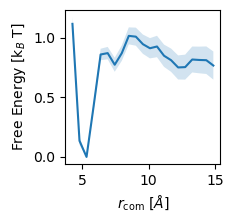

In [8]:
from matplotlib import pyplot as plt
rang = pmf.bin_centers < 15

fig, ax = plt.subplots(figsize=(2,2))
ax.plot(pmf.bin_centers[rang], pmf.free_energy[rang])
ax.fill_between(
    pmf.bin_centers[rang],
    pmf.free_energy[rang] - pmf.uncertainty[rang],
    pmf.free_energy[rang] + pmf.uncertainty[rang],
    alpha=0.2
)
ax.set_xlabel("$r_{\mathrm{com}}$ [$\AA$]")
ax.set_ylabel("Free Energy [k$_B$ T]")

The uncertainty is probably vastly underestimated, because
- simulations in each umbrella are not converged
- energy time series have not been subsampled to remove correlations

To modify this, check
https://github.com/noegroup/two_peptides/blob/main/two_peptides/pmf.py
